## Importing dependencies

In [114]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
import os 
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [115]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [116]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Removing unwanted images

In [117]:
data_dir = 'data'

In [118]:
image_extensions = ['jpeg','jpg', 'bmp']

In [119]:
#looping through the data directories to get all the images and then making sure they are in the right format

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_extensions: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('No issue with image {}'.format(image_path))

## Loading in data with tensorflow

In [120]:
#this will automatically reshape our images to 256x256 and the batch size will be 32(defualt)
#this will also create labels for our data as well
#images in the non_potatoes directory  will be labelled as 0 and the ones in the potatoes directory will be labelled as 1
data = tf.keras.preprocessing.image_dataset_from_directory('data')

Found 334 files belonging to 2 classes.


In [121]:
data_iterator = data.as_numpy_iterator()

In [122]:
#this will get the batches created
batch = data_iterator.next()

In [123]:
#images have been turned to numpy arrays to run through the cnn
batch[0]

array([[[[245.64844 , 245.64844 , 245.64844 ],
         [245.84601 , 245.84601 , 245.84601 ],
         [245.64844 , 245.64844 , 245.64844 ],
         ...,
         [245.64844 , 245.64844 , 245.64844 ],
         [245.64844 , 245.64844 , 245.64844 ],
         [246.06586 , 246.06586 , 246.06586 ]],

        [[245.10156 , 245.10156 , 245.10156 ],
         [246.      , 246.      , 246.      ],
         [246.      , 246.      , 246.      ],
         ...,
         [246.      , 246.      , 246.      ],
         [246.      , 246.      , 246.      ],
         [245.      , 245.      , 245.      ]],

        [[245.10156 , 245.10156 , 245.10156 ],
         [245.47308 , 245.47308 , 245.47308 ],
         [245.61517 , 245.61517 , 245.61517 ],
         ...,
         [245.24219 , 245.24219 , 245.24219 ],
         [245.24219 , 245.24219 , 245.24219 ],
         [245.      , 245.      , 245.      ]],

        ...,

        [[245.9754  , 245.9754  , 245.9754  ],
         [245.30469 , 245.30469 , 245.30469 ]

In [124]:
#all the labels  for the images
#0 = non_potatoes
#1 = potatoes
batch[1]

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int32)

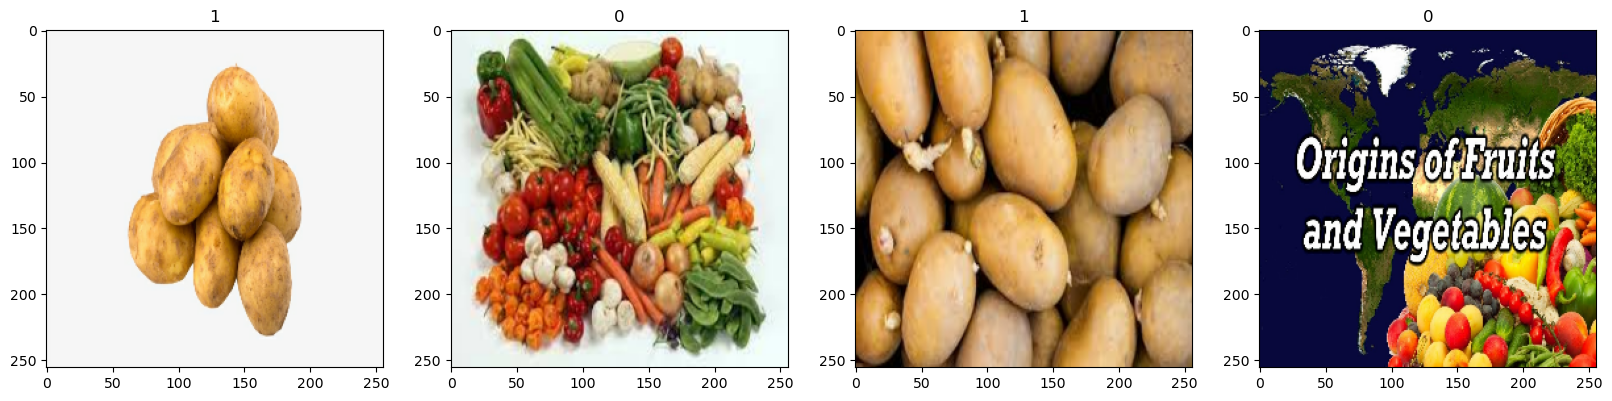

In [125]:
#visualising some images
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Scale data values to be between 0 and 1. 

In [126]:
#This will make the model generalise faster and produce better results
data = data.map(lambda x,y: (x/255, y))

In [ ]:
#scaled data
data.as_numpy_iterator().next()[0].max()